<a href="https://colab.research.google.com/github/lil-coderr/Technical-report/blob/main/Different_dimension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
import pandas as pd
#is a fast open-source tokenizer by OpenAI.
import tiktoken

import openai
from openai.embeddings_utils import get_embedding

In [ ]:
# embedding model parameters
embedding_model = "text-embedding-ada-002"
embedding_encoding = "cl100k_base"  # this the encoding for text-embedding-ada-002
max_tokens = 8000  # the maximum for text-embedding-ada-002 is 8191
openai.api_key = "YOUR API KEY"


In [ ]:
input_datapath = "/content/IMDB Dataset.csv"  # to save space, we provide a pre-filtered dataset
df = pd.read_csv(input_datapath)

In [ ]:
df = df.head(3000)
encoding = tiktoken.get_encoding(embedding_encoding)
# omit reviews that are too long to embed
df["n_tokens"] = df.review.apply(lambda x: len(encoding.encode(x)))


In [ ]:
df[df.n_tokens <= max_tokens]

,review,sentiment,n_tokens
0,One of the other reviewers has mentioned that ...,positive,392
1,A wonderful little production. <br /><br />The...,positive,210
2,I thought this was a wonderful way to spend ti...,positive,208
3,Basically there's a family where a little boy ...,negative,174
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,292
...,...,...,...
2995,To experience Head you really need to understa...,positive,151
2996,"I'm a fan of Judy Garland, Vincente Minnelli, ...",negative,239
2997,"""Mr. Harvey Lights a Candle"" is anchored by a ...",positive,491
2998,Della Myers (Kim Basinger) is an upper-class h...,negative,460


In [ ]:
df["embedding"] = df.review.apply(lambda x: get_embedding(x, engine=embedding_model))

In [ ]:
import pandas as pd
import numpy as np
from ast import literal_eval

from sklearn.metrics import classification_report

              precision    recall  f1-score   support

    negative       0.83      0.90      0.86      1492
    positive       0.89      0.81      0.85      1508

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000



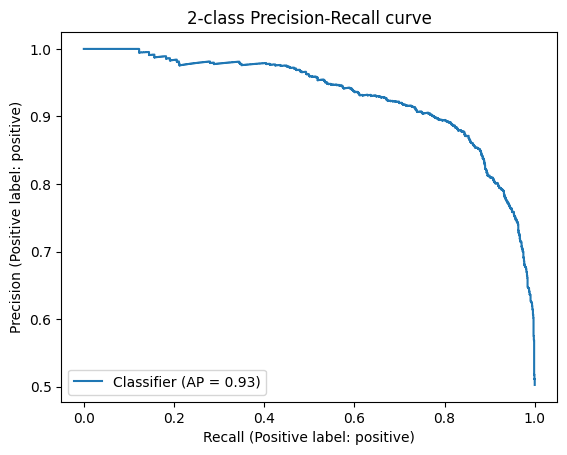

In [ ]:
from openai.embeddings_utils import cosine_similarity, get_embedding
from sklearn.metrics import PrecisionRecallDisplay

def evaluate_embeddings_approach(label_embeddings , model,  dataframe):
    def label_score(review_embedding, label_embeddings):
        return cosine_similarity(review_embedding, label_embeddings[1]) - cosine_similarity(review_embedding, label_embeddings[0])

    probas = dataframe["embedding"].apply(lambda x: label_score(x, label_embeddings))
    preds = probas.apply(lambda x: 'positive' if x>0 else 'negative')

    report = classification_report(df.sentiment, preds)
    print(report)

    display = PrecisionRecallDisplay.from_predictions(df.sentiment, probas, pos_label='positive')
    _ = display.ax_.set_title("2-class Precision-Recall curve")

labels=['negative', 'positive']
label_embeddings_dimension1 = [get_embedding(label, engine=embedding_model) for label in labels]
evaluate_embeddings_approach(label_embeddings_dimension1, model=embedding_model , dataframe = df )

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

              precision    recall  f1-score   support

    negative       0.91      0.85      0.88      1492
    positive       0.86      0.92      0.89      1508

    accuracy                           0.89      3000
   macro avg       0.89      0.88      0.88      3000
weighted avg       0.89      0.89      0.88      3000



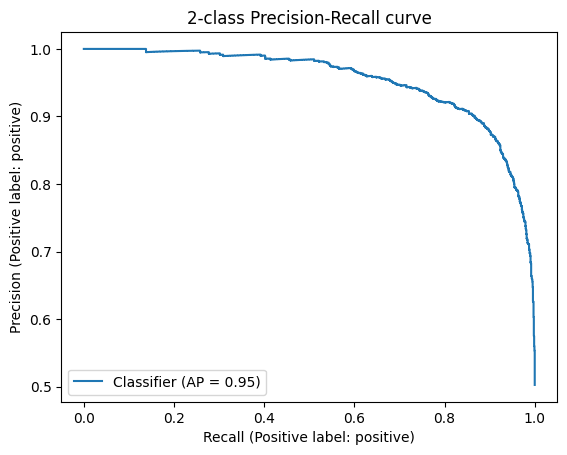

In [ ]:
pca = PCA(n_components=100)

matrix = np.array(df.embedding.to_list())

embeding_dimensions_2 = pca.fit_transform(matrix)
df_embeding_dimensions_2 = df[["review",	"sentiment",	"n_tokens"]]

df_embeding_dimensions_2["embedding"] = embeding_dimensions_2.tolist()


label_embeddings_dimension2 = pca.transform(np.array(label_embeddings_dimension1))

evaluate_embeddings_approach(label_embeddings_dimension2, embedding_model ,df_embeding_dimensions_2 )



              precision    recall  f1-score   support

    negative       0.91      0.87      0.89      1492
    positive       0.88      0.91      0.90      1508

    accuracy                           0.89      3000
   macro avg       0.90      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000



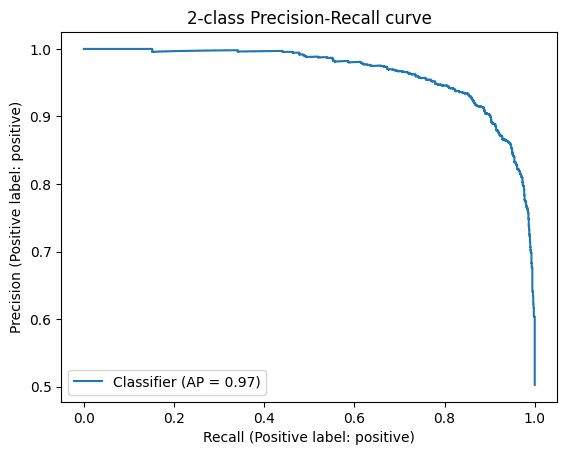

In [ ]:
pca = PCA(n_components=10)

embeding_dimensions_2 = pca.fit_transform(np.array(df.embedding.to_list()))
df_embeding_dimensions_3 = df[["review",	"sentiment",	"n_tokens"]]

df_embeding_dimensions_3["embedding"] = embeding_dimensions_2.tolist()


label_embeddings_dimension3 = pca.transform(np.array(label_embeddings_dimension1))

evaluate_embeddings_approach(label_embeddings_dimension3, embedding_model ,df_embeding_dimensions_3 )

              precision    recall  f1-score   support

    negative       0.87      0.84      0.86      1492
    positive       0.85      0.88      0.86      1508

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000



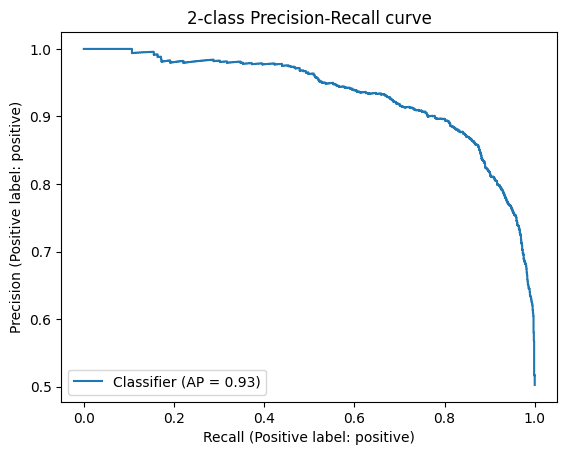

In [ ]:
pca = PCA(n_components=1000)

embeding_dimensions_2 = pca.fit_transform(np.array(df.embedding.to_list()))
df_embeding_dimensions_4 = df[["review",	"sentiment",	"n_tokens"]]

df_embeding_dimensions_4["embedding"] = embeding_dimensions_2.tolist()


label_embeddings_dimension4 = pca.transform(np.array(label_embeddings_dimension1))

evaluate_embeddings_approach(label_embeddings_dimension4, embedding_model ,df_embeding_dimensions_4 )

              precision    recall  f1-score   support

    negative       0.87      0.84      0.86      1492
    positive       0.85      0.88      0.86      1508

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000



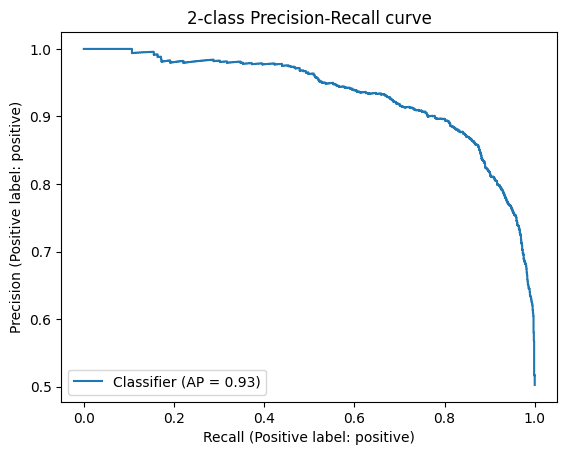

In [ ]:
evaluate_embeddings_approach(label_embeddings_dimension4, embedding_model ,df_embeding_dimensions_4 )